In [1]:
from rich import print as rprint
import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import main

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.precision", 2)


## Explorative Datenanalyse

-   Der zweite Datensatz hat sechs Verträge mehr als der erste Vertrag.


In [2]:
df = pd.read_csv("ins_claims.csv", index_col=0)

df["IDpol"] = df.index

rprint(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 678013 entries, 0 to 678012
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   IDpol        678013 non-null  int64  
 1   ClaimAmount  678013 non-null  float64
 2   ClaimNb      678013 non-null  float64
 3   Exposure     678013 non-null  float64
 4   Area         678013 non-null  object 
 5   VehPower     678013 non-null  float64
 6   VehAge       678013 non-null  float64
 7   DrivAge      678013 non-null  float64
 8   BonusMalus   678013 non-null  float64
 9   VehBrand     678013 non-null  object 
 10  VehGas       678013 non-null  object 
 11  Density      678013 non-null  float64
 12  Region       678013 non-null  object 
dtypes: float64(8), int64(1), object(4)
memory usage: 72.4+ MB


None

-   Beschreibung der Variablen


In [3]:
df.describe(include=["float64", "object"])


,ClaimAmount,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
count,6.78e+05,678013.00,6.78e+05,678013,678013.00,678013.00,678013.00,678013.00,678013,678013,678013.00,678013
unique,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,11,2,NaN,22
top,NaN,NaN,NaN,'C',NaN,NaN,NaN,NaN,'B12',Regular,NaN,'R24'
freq,NaN,NaN,NaN,191880,NaN,NaN,NaN,NaN,166024,345877,NaN,160601
mean,8.84e+01,0.05,5.29e-01,NaN,6.45,7.04,45.50,59.76,NaN,NaN,5.98,NaN
std,5.82e+03,0.24,3.64e-01,NaN,2.05,5.67,14.14,15.64,NaN,NaN,1.87,NaN
min,0.00e+00,0.00,2.73e-03,NaN,4.00,0.00,18.00,50.00,NaN,NaN,0.00,NaN
25%,0.00e+00,0.00,1.80e-01,NaN,5.00,2.00,34.00,50.00,NaN,NaN,4.52,NaN
50%,0.00e+00,0.00,4.90e-01,NaN,6.00,6.00,44.00,50.00,NaN,NaN,5.97,NaN
75%,0.00e+00,0.00,9.90e-01,NaN,7.00,11.00,55.00,64.00,NaN,NaN,7.41,NaN


-   Korrelations zwischen unabhängigen Variablen


In [11]:
df["ClaimExp"] = df["ClaimAmount"] / df["Exposure"]

df[df["ClaimAmount"] > 0].corr(numeric_only=True)


,IDpol,ClaimAmount,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimExp
IDpol,1.00e+00,-3.23e-03,3.50e-02,-8.93e-02,5.71e-02,-6.67e-02,5.00e-02,-0.02,4.89e-02,-2.98e-03
ClaimAmount,-3.23e-03,1.00e+00,3.27e-02,-2.78e-02,6.23e-03,8.05e-03,-1.65e-02,0.02,-4.07e-03,6.84e-01
ClaimNb,3.50e-02,3.27e-02,1.00e+00,-1.02e-02,-8.17e-03,-2.22e-02,-4.78e-03,0.06,4.41e-02,1.98e-02
Exposure,-8.93e-02,-2.78e-02,-1.02e-02,1.00e+00,-1.58e-02,7.11e-03,1.91e-01,-0.13,-7.59e-02,-8.00e-02
VehPower,5.71e-02,6.23e-03,-8.17e-03,-1.58e-02,1.00e+00,-1.56e-02,2.23e-02,-0.07,2.13e-02,5.88e-04
VehAge,-6.67e-02,8.05e-03,-2.22e-02,7.11e-03,-1.56e-02,1.00e+00,-7.17e-02,0.14,-6.91e-02,4.49e-03
DrivAge,5.00e-02,-1.65e-02,-4.78e-03,1.91e-01,2.23e-02,-7.17e-02,1.00e+00,-0.47,-3.70e-02,-2.81e-02
BonusMalus,-1.97e-02,2.03e-02,5.56e-02,-1.32e-01,-6.92e-02,1.39e-01,-4.72e-01,1.00,9.14e-02,2.26e-02
Density,4.89e-02,-4.07e-03,4.41e-02,-7.59e-02,2.13e-02,-6.91e-02,-3.70e-02,0.09,1.00e+00,1.54e-03
ClaimExp,-2.98e-03,6.84e-01,1.98e-02,-8.00e-02,5.88e-04,4.49e-03,-2.81e-02,0.02,1.54e-03,1.00e+00


### ClaimAmount und ClaimAmount/Exposure

-   Viele Nullen für `ClaimAmount`

-   Outliers


In [5]:
rprint(sum(df["ClaimAmount"] > 0.0) / df.shape[0])
rprint(sum(df["ClaimNb"] > 0.0) / df.shape[0])


0.0367898550617761

0.05023502499214617

<Axes: xlabel='IDpol', ylabel='ClaimAmount'>

array([<Axes: title={'center': 'ClaimAmount'}>], dtype=object)

<Axes: xlabel='IDpol', ylabel='ClaimExp'>

array([<Axes: title={'center': 'ClaimExp'}>], dtype=object)

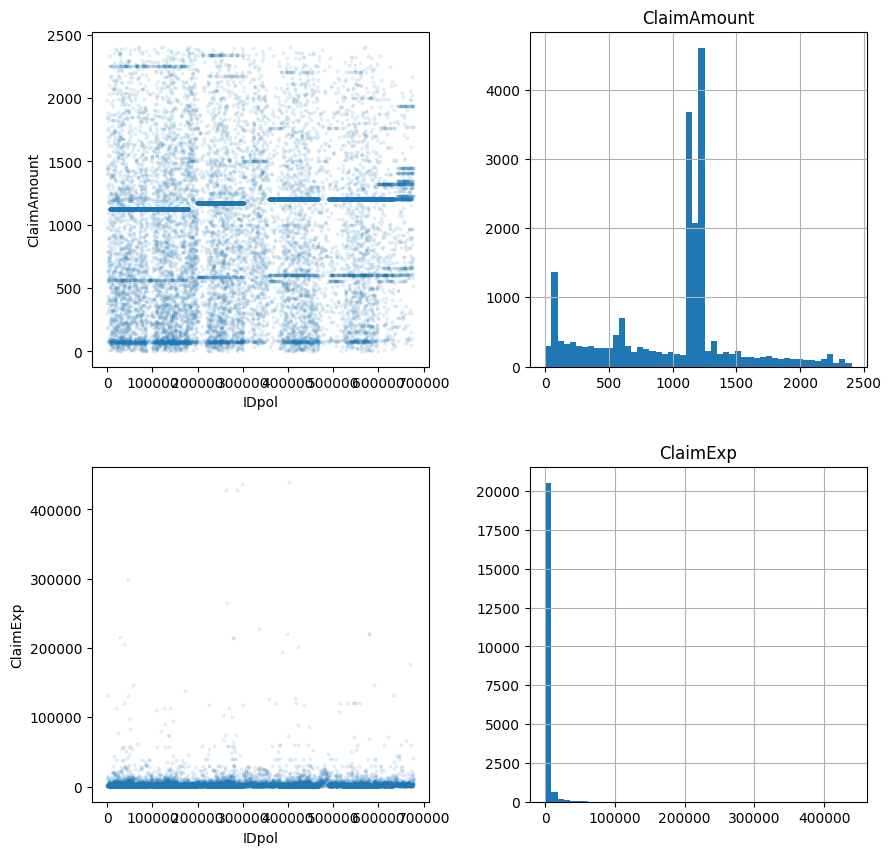

In [12]:
# Remove zeros and outliers
up_lim = df["ClaimAmount"].quantile(0.995)

logical_vec = (df["ClaimAmount"] > 0.0) * (df["ClaimAmount"] < up_lim)

df_sev = df[logical_vec]

# Plot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot ClaimAmount
df_sev.plot.scatter(
    x="IDpol",
    y="ClaimAmount",
    marker=".",
    alpha=0.1,
    linewidth=0.5,
    ax=axs[0, 0],
)

df_sev.hist(column="ClaimAmount", bins=50, ax=axs[0, 1])

# Plot Claim per Exposure Year
df_sev.plot.scatter(
    x="IDpol", y="ClaimExp", marker=".", alpha=0.1, linewidth=0.5, ax=axs[1, 0]
)

df_sev.hist(column="ClaimExp", bins=50, ax=axs[1, 1])


-   Scatter plot


### ClaimNb und Density


array([<Axes: title={'center': 'ClaimNb'}>], dtype=object)

<Axes: xlabel='IDpol', ylabel='ClaimNb'>

array([<Axes: title={'center': 'Density'}>], dtype=object)

<Axes: xlabel='IDpol', ylabel='Density'>

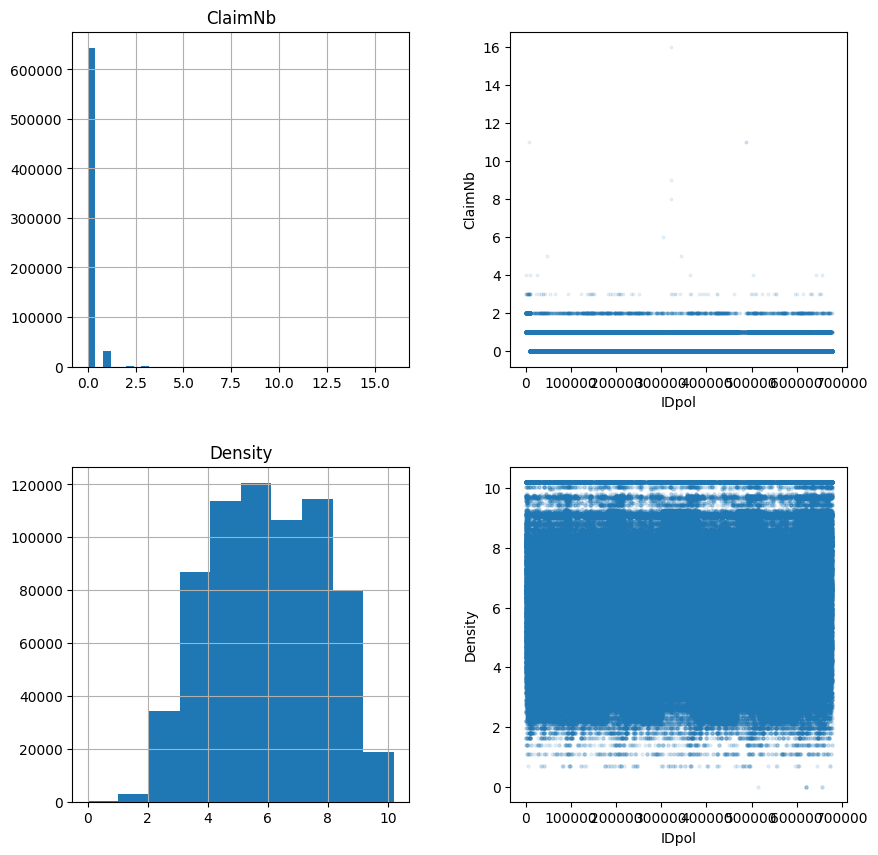

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Vehicle Brand
df.hist(column="ClaimNb", bins=40, ax=axs[0, 0])
df.plot.scatter(
    x="IDpol", y="ClaimNb", marker=".", alpha=0.1, linewidth=0.5, ax=axs[0, 1]
)

df.hist(column="Density", bins=10, ax=axs[1, 0])
df.plot.scatter(x="IDpol", y="Density", marker=".", alpha=0.1, ax=axs[1, 1])


### DrivAge, VehAge, VehPower and BonusMalus


array([[<Axes: title={'center': 'DrivAge'}>,
        <Axes: title={'center': 'VehAge'}>],
       [<Axes: title={'center': 'VehPower'}>,
        <Axes: title={'center': 'BonusMalus'}>],
       [<Axes: >, <Axes: >]], dtype=object)

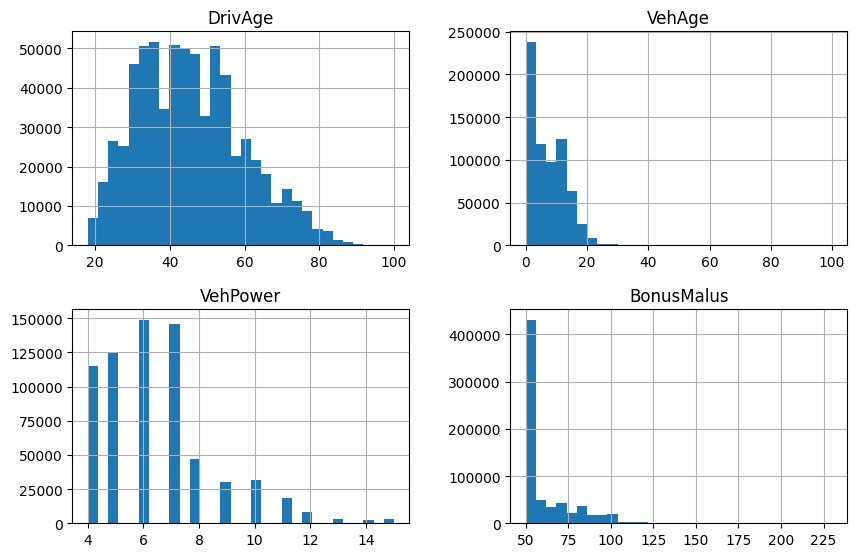

In [8]:
df.hist(
    column=["DrivAge", "VehAge", "VehPower", "BonusMalus"],
    bins=30,
    layout=(3, 2),
    figsize=(10, 10),
)


### Area and Region


<Axes: xlabel='Area'>

<Axes: xlabel='Area'>

<Axes: xlabel='Region'>

<Axes: xlabel='Region'>

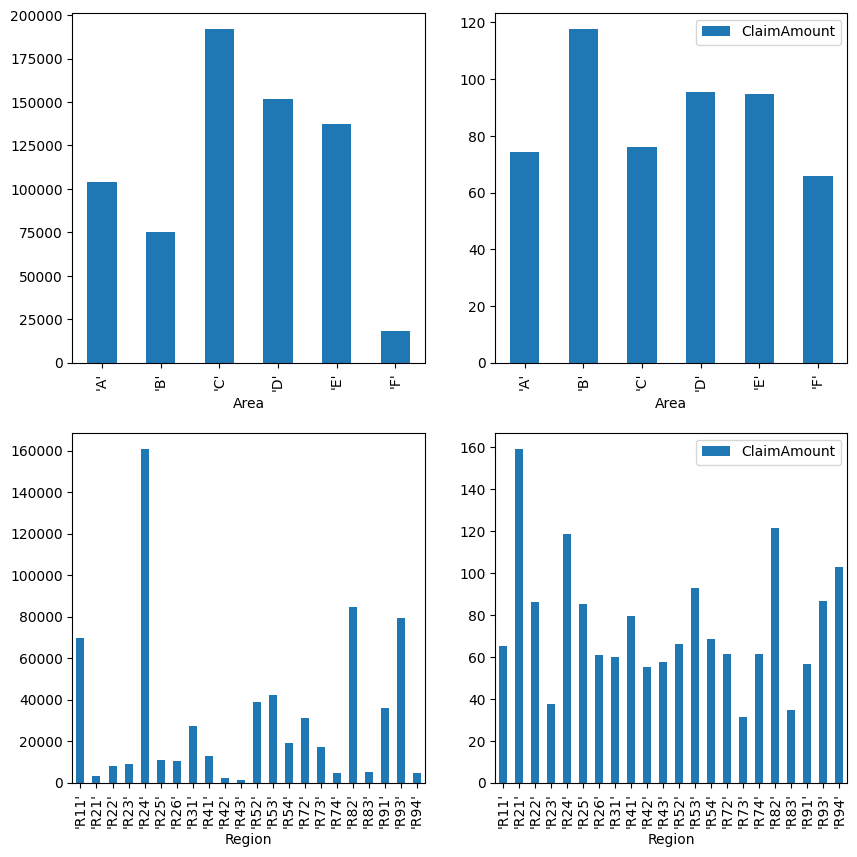

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Area
df[["Area"]].groupby("Area").size().plot(kind="bar", ax=axs[0, 0])

df[["Area", "ClaimAmount"]].groupby("Area").mean().plot(
    kind="bar", ax=axs[0, 1]
)

# Region
df[["Region"]].groupby("Region").size().plot(kind="bar", ax=axs[1, 0])

df[["Region", "ClaimAmount"]].groupby("Region").mean().plot(
    kind="bar", ax=axs[1, 1]
)


fig, (ax1, ax2) = plt.subplots(1, 2)

df.groupby("Area").size().plot(kind="bar", ax=ax1)

df[["Area", "ClaimAmount"]].groupby("Area").mean().plot(kind="bar", ax=ax2)


### Vehicle Brand and Vehicle Gas-Type


<Axes: xlabel='VehBrand'>

<Axes: xlabel='VehBrand'>

<Axes: xlabel='VehGas'>

<Axes: xlabel='VehGas'>

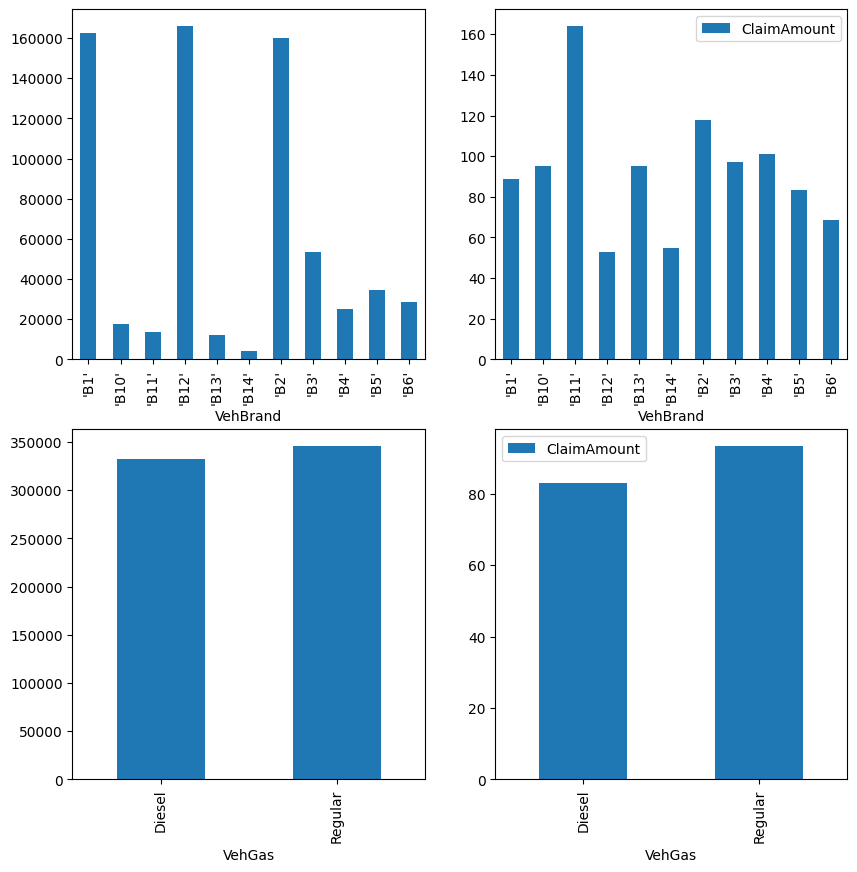

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Vehicle Brand
df[["VehBrand"]].groupby("VehBrand").size().plot(kind="bar", ax=axs[0, 0])

df[["VehBrand", "ClaimAmount"]].groupby("VehBrand").mean().plot(
    kind="bar", ax=axs[0, 1]
)

# Vehicle Gas-Type
df[["VehGas"]].groupby("VehGas").size().plot(kind="bar", ax=axs[1, 0])

df[["VehGas", "ClaimAmount"]].groupby("VehGas").mean().plot(
    kind="bar", ax=axs[1, 1]
)


## Feature engineering


-   `load_csv()` function in `main.py`


## Modellvergleich


-   `obj.score()` method
-   RMSE


## Modellbuilding


-   Generalized Linear Models (GLM)
-   Generalized Additive Models (GAM)
-   Tree based
-   Neural Networks

-   Yang, Qian, Zou (2018), namens "Insurance premium prediction via gradient tree-boosted Tweedie compound Poisson models"

-   Vielleicht Bayesianische Statistik


##### Frequency-Severity Decomposition

-   Poisson regression für `ClaimNb` und Gamma regression für `ClaimAmount` pro Claim
-   Claim Frequency ist einfacher zu modellieren
-   Claim Severity ist schwierig
-   Man kann nicht kontrollieren wie viel Schaden es geben wird
-   "Overall, the modeling of claim amounts is more difficult than claim frequencies" Deinut, et. al. (2019), p18

##### Nulls

-   Tweedie regression
-   Erstens Classification, dann Modellierung
    -   Codes mit perfekter Klassifikation
-   Die Codes mit klassifikation

##### Outliers

-   $p$ für Outliers and $1-p$ für nicht Outliers
